**Problem 1 (70 points)**

Consider the initial value problem given below.
 
 $\ddot x + 2\dot x + 5y = 3$
 
 $\dot x + 2y = \dot y$
 
 $x(0) = 0$
 
 $ẋ(0) = 0$
 
 $y(0) = 1$


a) Rewrite the system as a system of first-order differential equations.

Step 1 - To choose one variable for each unknown and each derivative up to first order

$u_1 = x$

$u_2 = \dot x$

$u_3 = y$

Step 2 - To express the derivatives of the states

- From definitions:

    $\dot u1 = \dot x = u2$

- First equation: $\ddot x + 2\dot x + 5y = 3$

    $\ddot x = 3 - 2\dot x - 5y  ⇒ \dot u = 3 - 2u_2 - 5u_3$

- Second equation: $\dot x + 2y = \dot y$

    $\dot y = \dot x + 2y ⇒ \dot u_3 = u_2 + 2u_3$


In [49]:
# libraries used
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [50]:
# System of ODEs
def f(t, u):
    x, xd, y = u
    xdd = 3 - 2*xd - 5*y
    yd = xd + 2*y
    return np.array([xd, xdd, yd])

In [51]:
# Time parameters and initial conditions
h = 0.1 # time step
t = np.arange(0.0, 10.0 + 1e-12, h) # time vector
n = len(t)  # number of time steps
u0 = np.array([0.0, 0.0, 1.0])  # initial conditions: [x(0), ẋ(0), y(1)]

b) Show that the exact solution to this system is given by:
 
 x(t) = 2 cos(t) + 6 sin(t) – 2 – 6t
 
 y(t) = – 2 cos(t) + 2 sin(t) + 3

In [52]:
# Exact solutions for comparison - x(t)
def x_exact(tt):
    return 2*np.cos(tt) + 6*np.sin(tt) - 2 - 6*tt

# Exact solutions for comparison - y(t)
def y_exact(tt):
    return -2*np.cos(tt) + 2*np.sin(tt) + 3

x_ex = x_exact(t)
y_ex = y_exact(t)

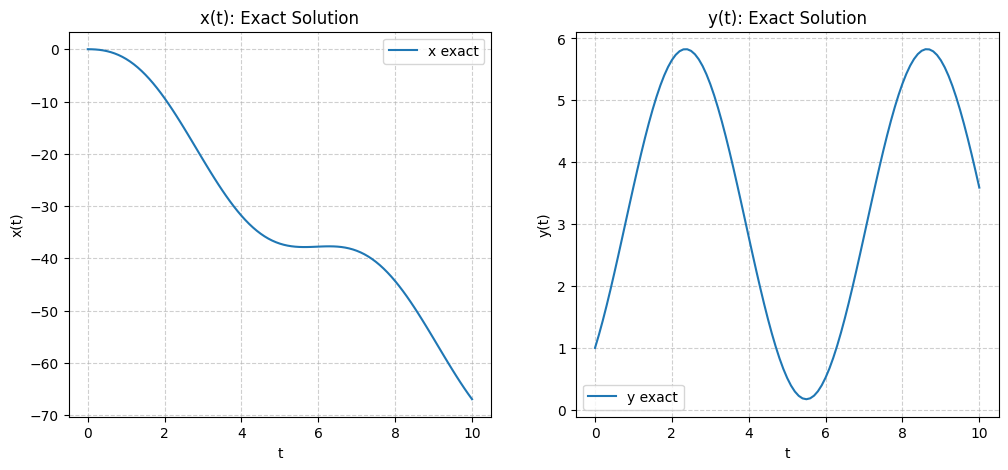

In [53]:
# Plot Exact solution for x(t) and y(t)
# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  

# Plot x(t)
axs[0].plot(t, x_ex, label="x exact")
axs[0].set_xlabel("t")
axs[0].set_ylabel("x(t)")
axs[0].set_title("x(t): Exact Solution")
axs[0].legend()
axs[0].grid(True, linestyle="--", alpha=0.6)

# Plot y(t)
axs[1].plot(t, y_ex, label="y exact")
axs[1].set_xlabel("t")
axs[1].set_ylabel("y(t)")
axs[1].set_title("y(t): Exact Solution")
axs[1].legend()
axs[1].grid(True, linestyle="--", alpha=0.6)

plt.show()

c) Approximate the solution in the interval [0, 10] using a time step of h = 0.1 and 
the Euler method.

In [54]:
# Euler method
u_euler = np.zeros((n,3)) # Initialize solution array    
u_euler[0]=u0 # initial conditions: [x(0), ẋ(0), y(1)]

for k in range(n-1):
    u_euler[k+1] = u_euler[k] + h*f(t[k], u_euler[k])

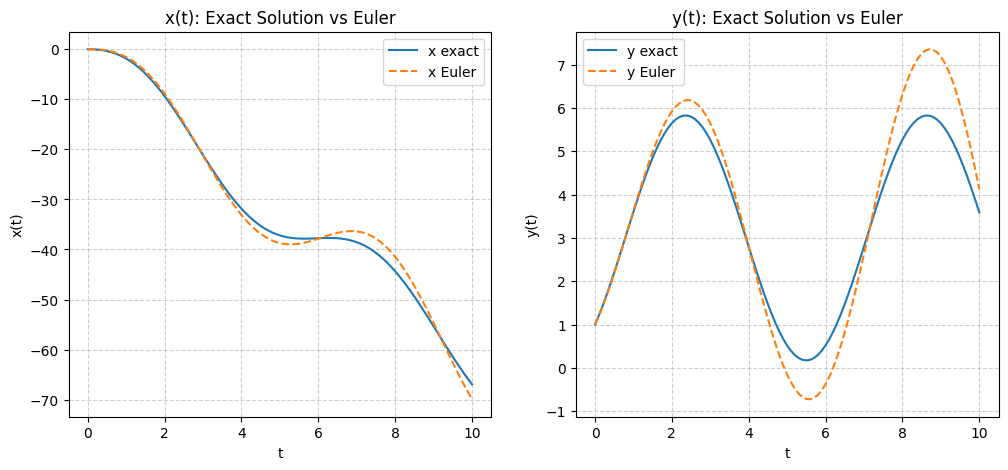

In [55]:
# Plot Exact solution for x(t) and y(t) Plus Euler Method
# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  

# Plot x(t)
axs[0].plot(t, x_ex, label="x exact")
axs[0].plot(t, u_euler[:, 0], label="x Euler", linestyle="dashed")
axs[0].set_xlabel("t")
axs[0].set_ylabel("x(t)")
axs[0].set_title("x(t): Exact Solution vs Euler")
axs[0].legend()
axs[0].grid(True, linestyle="--", alpha=0.6)

# Plot y(t) 
axs[1].plot(t, y_ex, label="y exact")   
axs[1].plot(t, u_euler[:, 2], label="y Euler", linestyle="dashed")
axs[1].set_xlabel("t")
axs[1].set_ylabel("y(t)")
axs[1].set_title("y(t): Exact Solution vs Euler")
axs[1].legend()
axs[1].grid(True, linestyle="--", alpha=0.6)

plt.show()

 d) Approximate the solution in the interval [0, 10] using a time step of h = 0.1 and 
the 4th-order Runge-Kutta method.

In [56]:
# 4th-order Runge-Kutta method
u_rk4 = np.zeros((n,3))
u_rk4[0]=u0 # initial conditions: [x(0), ẋ(0), y(1)]

for k in range(n-1):
    k1=f(t[k],u_rk4[k])
    k2=f(t[k]+0.5*h,u_rk4[k]+0.5*h*k1)
    k3=f(t[k]+0.5*h,u_rk4[k]+0.5*h*k2)
    k4=f(t[k]+h,u_rk4[k]+h*k3)
    u_rk4[k+1]=u_rk4[k]+(h/6)*(k1+2*k2+2*k3+k4)

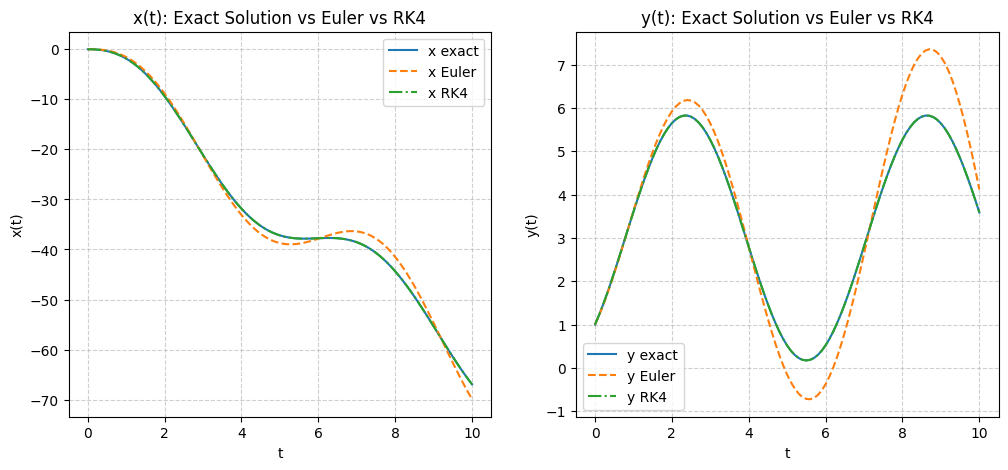

In [57]:
# Plot Exact solution for x(t) and y(t) Plus Euler Method plus 4th-order Runge-Kutta method
# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  

# Plot x(t)
axs[0].plot(t, x_ex, label="x exact")
axs[0].plot(t, u_euler[:, 0], label="x Euler", linestyle="dashed")
axs[0].plot(t, u_rk4[:, 0], label="x RK4", linestyle="dashdot") # Added 4th-order Runge-Kutta method solution
axs[0].set_xlabel("t")
axs[0].set_ylabel("x(t)")
axs[0].set_title("x(t): Exact Solution vs Euler vs RK4")
axs[0].legend()
axs[0].grid(True, linestyle="--", alpha=0.6)

# Plot y(t) 
axs[1].plot(t, y_ex, label="y exact")   
axs[1].plot(t, u_euler[:, 2], label="y Euler", linestyle="dashed")
axs[1].plot(t, u_rk4[:, 2], label="y RK4", linestyle="dashdot") # Added 4th-order Runge-Kutta method solution
axs[1].set_xlabel("t")
axs[1].set_ylabel("y(t)")
axs[1].set_title("y(t): Exact Solution vs Euler vs RK4")
axs[1].legend()
axs[1].grid(True, linestyle="--", alpha=0.6)

plt.show()

e) Compare and discuss the obtained results, providing the proper comments.

xxxxxxxxxxxxxxxxxxxxxxx

**Problem 2 (30 points)**

Python has a routine called **odeint** (similar to Matlab's ode45) that can be 
imported from the **scipy.integrate** library to solve coupled differential 
equations using an iterative algorithm based on the fourth- and fifth-order 
Runge-Kutta methods. 

Apply the **odeint** function to solve the system of differential equations in 
Problem 1 and compare the results. To use the function, see the example in 
Appendix 2.

Provide the proper comments.


In [58]:
# Using scipy.integrate.odeint
# Define the system of ODEs for odeint - note the order of arguments
def equt(u, t):
    x, xd, y = u
    xdd = 3 - 2*xd - 5*y
    yd = xd + 2*y
    return [xd, xdd, yd]


sol = odeint(equt, u0, t) #, tfirst=True)

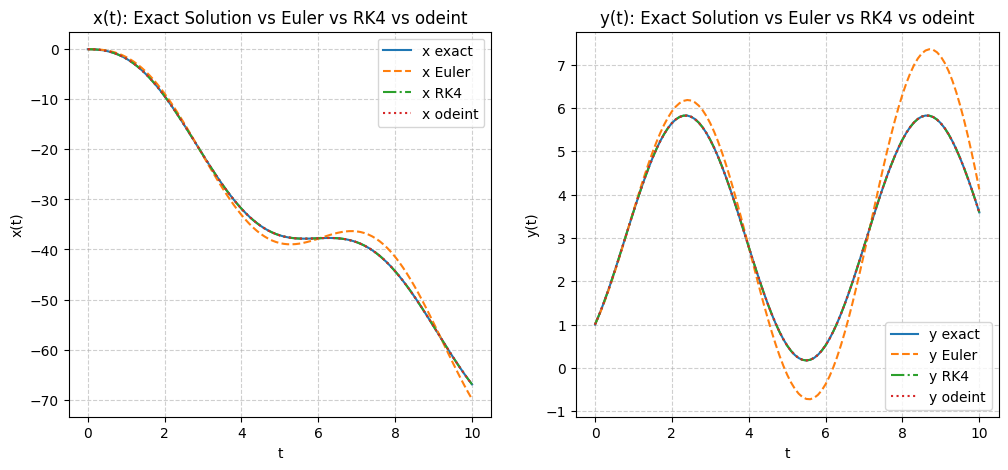

In [59]:
# Plot Exact solution for x(t) and y(t) Plus Euler Method plus RK4 Plus odeint
# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  

# Plot x(t)
axs[0].plot(t, x_ex, label="x exact")
axs[0].plot(t, u_euler[:, 0], label="x Euler", linestyle="dashed")
axs[0].plot(t, u_rk4[:, 0], label="x RK4", linestyle="dashdot")
axs[0].plot(t, sol[:, 0], label="x odeint", linestyle="dotted") # Added odeint solution
axs[0].set_xlabel("t")
axs[0].set_ylabel("x(t)")
axs[0].set_title("x(t): Exact Solution vs Euler vs RK4 vs odeint")
axs[0].legend()
axs[0].grid(True, linestyle="--", alpha=0.6)

# Plot y(t) 
axs[1].plot(t, y_ex, label="y exact")   
axs[1].plot(t, u_euler[:, 2], label="y Euler", linestyle="dashed")
axs[1].plot(t, u_rk4[:, 2], label="y RK4", linestyle="dashdot")
axs[1].plot(t, sol[:, 2], label="y odeint", linestyle="dotted") # Added odeint solution
axs[1].set_xlabel("t")
axs[1].set_ylabel("y(t)")
axs[1].set_title("y(t): Exact Solution vs Euler vs RK4 vs odeint")
axs[1].legend()
axs[1].grid(True, linestyle="--", alpha=0.6)

plt.show()

**Comments**

xxxxxxxxxxxxxxx